# 5.3 Lab: Cross-Validation and the Bootstrap

## Load Auto data

In [58]:
# load Auto dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Auto = pd.read_csv("data/Auto.csv")
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [59]:
# more info
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [60]:
# replace '?' in hoursepower with NaN
Auto.replace(to_replace='?', value=np.nan, inplace=True)
Auto.horsepower=np.float64(Auto.horsepower)
print(Auto.shape)

# drop sample with nan
Auto.dropna(axis=0, how='any', inplace=True)
print(Auto.shape)

(397, 9)
(392, 9)


In [61]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


## 5.3.1 The Validation Set Approach


In [62]:
# sklearn has spliting method!
from sklearn.model_selection import train_test_split
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

train_set, test_set = train_test_split(Auto, test_size=0.5)
print(train_set.shape)
print(test_set.shape)

(196, 9)
(196, 9)


### Linear regression

In [82]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_set.horsepower.values.reshape(-1, 1), train_set.mpg)
mpg_pred = model.predict(test_set.horsepower.values.reshape(-1, 1))

array([190.,  46.,  75.,  92., 115.,  80.,  75.,  81.,  96.,  95., 175.,
        74.,  48.,  70., 170.,  96., 208.,  65., 105.,  70.,  85.,  85.,
       148.,  68.,  60., 158., 149.,  67.,  85.,  81.,  83., 110.,  76.,
        54.,  90., 150.,  65.,  92., 110., 150., 100., 200.,  88.,  76.,
       145., 100.,  52.,  88.,  75.,  67., 110.,  78.,  85., 112.,  95.,
       100.,  65.,  76.,  75., 110.,  65.,  97., 112., 153., 150.,  90.,
        80.,  90.,  68.,  88.,  98.,  78.,  97.,  97.,  85., 138., 140.,
       180.,  95.,  74.,  68., 100.,  79., 150.,  79., 130., 110.,  85.,
        70., 110., 110.,  72., 108., 150., 110.,  88.,  78.,  72.,  70.,
        58., 198., 150., 100., 150.,  71.,  68.,  67.,  80.,  88., 215.,
        62.,  67., 110.,  70.,  75., 140.,  69.,  97.,  86., 150.,  90.,
       180.,  71., 215., 145.,  84.,  70., 115.,  83.,  72., 140.,  90.,
       122., 150.,  95., 198.,  86.,  75.,  90.,  90.,  90.,  95.,  77.,
       100.,  78.,  84., 110.,  63.,  70.,  80., 14

In [69]:
# calculate MSE and RMSE
from sklearn import metrics

print ("The MSE is: {:.3}".format( metrics.mean_squared_error(test_set.mpg, mpg_pred) )  )
print ("The RMSE is: {:.3}".format( np.sqrt( metrics.mean_squared_error(test_set.mpg, mpg_pred))))

The MSE is: 24.8
The RMSE is: 4.98


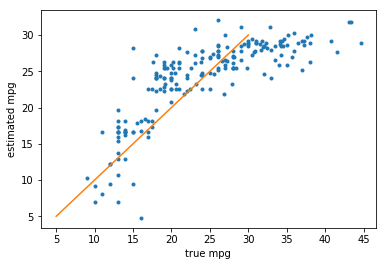

In [72]:
plt.plot(test_set.mpg, mpg_pred, '.')
plt.plot((5,30),(5,30))
plt.xlabel('true mpg')
plt.ylabel('estimated mpg')

### [TODO] Re-fit with higher order polynomials  and compare MSEs

## 5.3.2 Leave-One-Out Cross-Validation

24.231513517929226


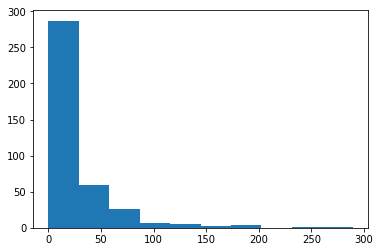

In [116]:
from sklearn.model_selection import LeaveOneOut
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html
# http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

model = LinearRegression()
    
loo = LeaveOneOut()
MSEs = list()
for train_idx, test_idx in loo.split(Auto):
    #print("%s %s" % (train_idx, test_idx))

    # split the data into two 
    train_set = Auto.iloc[train_idx]
    test_set = Auto.iloc[test_idx]
    
    model.fit(train_set.horsepower.values.reshape(-1, 1), train_set.mpg)
    mpg_pred = model.predict(test_set.horsepower.values.reshape(-1, 1))

    MSEs.append(metrics.mean_squared_error(test_set.mpg, mpg_pred))


# plot histogram
plt.hist(MSEs)

# calc mean
print(np.mean(MSEs))




## 5.3.3 k-Fold Cross-Validation

24.40138940058588


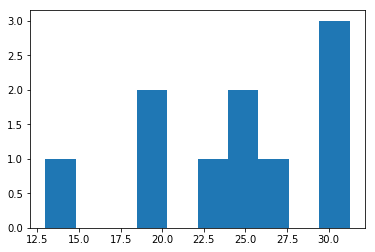

In [121]:
from sklearn.model_selection import KFold
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html  
# http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

model = LinearRegression()
    
kf = KFold(n_splits=10, shuffle=True)

MSEs = list()
for train_idx, test_idx in kf.split(Auto):
    #print("%s %s" % (train_idx, test_idx))

    # split the data into two 
    train_set = Auto.iloc[train_idx]
    test_set = Auto.iloc[test_idx]
    
    model.fit(train_set.horsepower.values.reshape(-1, 1), train_set.mpg)
    mpg_pred = model.predict(test_set.horsepower.values.reshape(-1, 1))

    MSEs.append(metrics.mean_squared_error(test_set.mpg, mpg_pred))


# plot histogram
plt.hist(MSEs)

# calc mean
print(np.mean(MSEs))



### Short version using sklearn!

In [87]:
from sklearn.model_selection import cross_val_score
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

model = LinearRegression()
scores = cross_val_score(model, Auto.horsepower.values.reshape(-1, 1), Auto.mpg, cv=10, scoring='neg_mean_squared_error')
mse_scores = -scores
print(mse_scores)
print("10-Fold CV MSE = %.3f" % (np.array(mse_scores).mean()))

[28.34783584 17.22640854 26.92535793 23.36016122 15.55763304 17.89383456
 17.04476867 22.83657872 65.93489567 39.27186233]
10-Fold CV MSE = 27.440


### [TODO] Re-fit with higher order polynomials  and compare MSEs

## 5.3.4 The Bootstrap

In [125]:
# load Portfolio dataset
Portfolio = pd.read_csv("data/Portfolio.csv", index_col=0)
Portfolio.head()

,X,Y
1,-0.895251,-0.234924
2,-1.562454,-0.885176
3,-0.417090,0.271888
4,1.044356,-0.734198
5,-0.315568,0.841983


In [152]:
# function to estimate alpha from data pairs (X,Y)
def estimate_alpha(data,index):
    # select data by index
    X=data.iloc[index].X
    Y=data.iloc[index].Y
    
    # calc variance and covariance
    covMat = np.cov(X,Y)
    varX = covMat[0][0]
    varY = covMat[1][1]
    covXY = covMat[0][1]

    return((varY-covXY)/(varX+varY-2*covXY))


In [161]:
# estimate alpha using all the samples
estimate_alpha(Portfolio, range(100))

0.57583207459283

0.5768849449865131
0.09224763427493565


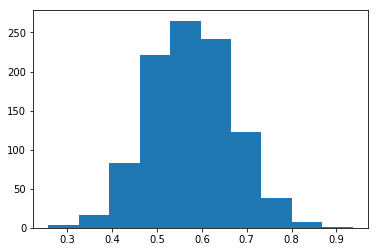

In [181]:
# repeat B=1000 times random sample with replacement
B=1000
alphas=list()
for b in range(B):
    index = np.random.choice(range(100),100)
    alphas.append(estimate_alpha(Portfolio,index))

# plot histogram of estimates
plt.hist(alphas)

# mean and std of estimates 
print(np.mean(alphas))
print(np.std(alphas))

In [182]:
## [ToDo] Calculate bootstrap standard errors of linear regression for Auto data